In [856]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [857]:
data = pd.read_csv('dataset.csv')
data

,area,bathroom,classification
0,2104,3,1
1,1600,3,1
2,2400,3,1
3,1416,2,0
4,3000,4,0
5,1985,4,1
6,1534,3,0
7,1427,3,1
8,1380,3,1
9,1494,3,1


In [858]:
X = data[['area', 'bathroom']].values
y = data['classification'].values

In [859]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

# X_train and y_train are the training data
# X_test and y_test are the test data
# test_size = 0.2 means 20% of the data will be used for testing

In [860]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Standardization scales the data to have a mean of 0 and a standard deviation of 1
# Fit calculates the mean and std dev from the training data and applies
# the transformation to standardize it.
# Transform applies the same scaling parameters from the training data
# to the test data

In [861]:
np.random.seed(16) # Random seed for reproducibility

In [862]:
# Weights from input layer to hidden layer
W1 = np.random.randn(2, 4) * 0.01 # Small random values for weights

# Bias for hidden layer 1 neurons initialized to zero
b1 = np.zeros((1, 4))  

In [863]:
# Weights from hidden layer to output layer
W2 = np.random.randn(4, 1) * 0.01

# Bias for output neuron initialized to zero
b2 = np.zeros((1, 1)) 

In [864]:
# Display initialized Weights and Biases
print("Initial Weights from Input to Hidden Layer (W1):\n", W1)
print("\nInitial Biases for Hidden Layer (b1):\n", b1)
print("\nInitial Weights from Hidden to Output Layer (W2):\n", W2)
print("\nInitial Bias for Output Layer (b2):\n", b2)

Initial Weights from Input to Hidden Layer (W1):
 [[ 0.00127949 -0.01528473 -0.00594468  0.0006633 ]
 [-0.01235495 -0.00621369 -0.00888948  0.0049891 ]]

Initial Biases for Hidden Layer (b1):
 [[0. 0. 0. 0.]]

Initial Weights from Hidden to Output Layer (W2):
 [[-0.00786897]
 [ 0.00118744]
 [-0.00756863]
 [ 0.00493367]]

Initial Bias for Output Layer (b2):
 [[0.]]


In [865]:
# Loss and Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return np.where(x > 0, 1, 0)

def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [866]:
learning_rate = 0.1
epochs = 10000

In [867]:
y_train = y_train.reshape(-1, 1)  # Reshape to (8, 1)

In [868]:
loss_values = [] # to store loss values

for epoch in range(epochs):
    # Forward Pass
    hidden_layer_input = np.dot(X_train, W1) + b1  # Input to hidden layer
    hidden_layer_output = relu(hidden_layer_input)  # Activation for hidden layer
    output_layer_input = np.dot(hidden_layer_output, W2) + b2  # Input to output layer
    y_pred = sigmoid(output_layer_input)  # Activation for output layer

    # Compute Loss
    loss = mse_loss(y_train, y_pred)

    if epoch % 50 == 0: # To make the graph look less jagged and show the overall trend
        loss_values.append(loss)  # Store loss for plotting

    # Backward Pass (Gradient Descent)
    # Output Layer Gradients
    output_error = y_train - y_pred
    output_delta = output_error * sigmoid_derivative(y_pred)

    # Hidden Layer Gradients
    hidden_layer_error = output_delta.dot(W2.T)
    hidden_layer_delta = hidden_layer_error * relu_derivative(hidden_layer_output)

    # Update Weights and Biases
    W2 += hidden_layer_output.T.dot(output_delta) * learning_rate
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate
    W1 += X_train.T.dot(hidden_layer_delta) * learning_rate
    b1 += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    # if epoch % 100 == 0:
    #     print(f'Epoch {epoch}, Loss: {loss}')

In [869]:
threshold = 0.5 

predictions = (y_pred >= threshold).astype(int)
print("Final predicted probabilities:\n", y_pred)
print("\nPredicted classes (0 = Bad, 1 = Good): \n", predictions)

Final predicted probabilities:
 [[9.70506949e-01]
 [1.00000000e+00]
 [9.64705920e-01]
 [9.33294294e-01]
 [1.94885745e-05]
 [1.00000000e+00]
 [7.71400690e-02]
 [1.00000000e+00]]

Predicted classes (0 = Bad, 1 = Good): 
 [[1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]]


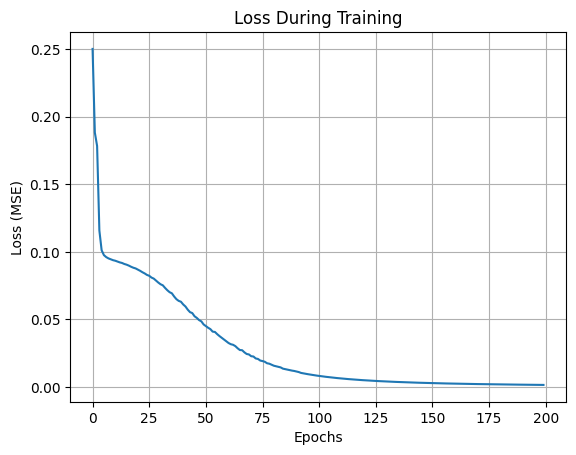

In [870]:
# Plot loss values during training
plt.plot(loss_values)
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.grid()
plt.show()

In [871]:
print("Final Weights from Input to Hidden Layer (W1):")
print(W1)
print("Final Biases for Hidden Layer (b1):")
print(b1)
print("Final Weights from Hidden to Output Layer (W2):")
print(W2)
print("Final Bias for Output Layer (b2):")
print(b2)


Final Weights from Input to Hidden Layer (W1):
[[ 4.26233533  1.6543546   3.70717567  8.00778121]
 [-1.13215426 -0.43818159 -0.98444908  0.35323055]]
Final Biases for Hidden Layer (b1):
[[3.18266193 1.23439379 2.7660229  4.89551362]]
Final Weights from Hidden to Output Layer (W2):
[[-5.43731558]
 [-2.10956923]
 [-4.72784024]
 [ 9.30172907]]
Final Bias for Output Layer (b2):
[[3.49373461]]


In [872]:
new_properties = np.array([ # Example Properties
    [1800, 2], 
    [1500, 3] 
    ])

In [873]:
# Forward Pass for New Properties
hidden_layer_input_new = np.dot(new_properties, W1) + b1
hidden_layer_output_new = relu(hidden_layer_input_new)
output_layer_input_new = np.dot(hidden_layer_output_new, W2) + b2
y_pred_new = sigmoid(output_layer_input_new)  # Predicted probabilities

# Classify based on threshold (e.g., 0.5)
classifications = (y_pred_new > 0.5).astype(int)  # Converts probabilities to 0 or 1

print("Predicted Classifications for New Properties:\n", classifications)


Predicted Classifications for New Properties:
 [[1]
 [1]]
